In [1]:
import torch
from matplotlib import pyplot as plt

In [4]:
learning_rate=0.01
x=torch.rand([20,1])
x

tensor([[0.4725],
        [0.9609],
        [0.6361],
        [0.8227],
        [0.7059],
        [0.1138],
        [0.1494],
        [0.6172],
        [0.6349],
        [0.1479],
        [0.0420],
        [0.3023],
        [0.0451],
        [0.5514],
        [0.4382],
        [0.5012],
        [0.8693],
        [0.2742],
        [0.2585],
        [0.2080]])

In [5]:
y_true=x*4+8
y_true

tensor([[ 9.8899],
        [11.8436],
        [10.5446],
        [11.2909],
        [10.8235],
        [ 8.4553],
        [ 8.5976],
        [10.4686],
        [10.5395],
        [ 8.5916],
        [ 8.1680],
        [ 9.2090],
        [ 8.1802],
        [10.2057],
        [ 9.7529],
        [10.0050],
        [11.4773],
        [ 9.0970],
        [ 9.0341],
        [ 8.8322]])

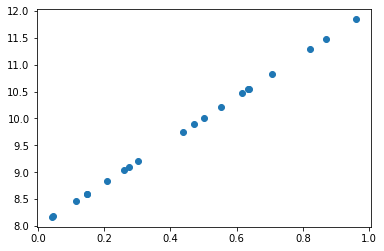

In [6]:
plt.scatter(x.numpy().reshape(-1),y_true.reshape(-1))
plt.show()

C:\Users\loneve\AppData\Local\Temp\ipykernel_24968\1360324031.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes=Axes3D(figure)


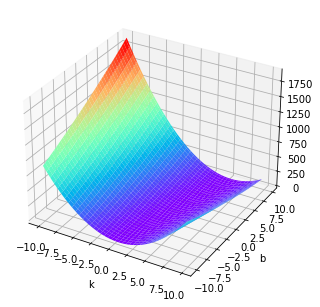

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
figure=plt.figure()
axes=Axes3D(figure)
x=np.arange(-10,10,0.25)
y=np.arange(-10,10,0.25)
x,y=np.meshgrid(x,y)
z=1/2*(4*x-y-12)**2
axes.plot_surface(x,y,z,cmap='rainbow')
plt.xlabel('k')
plt.ylabel('b')
plt.show()

In [8]:
w=torch.rand([1,1],requires_grad=True)
w

tensor([[0.1246]], requires_grad=True)

In [9]:
b=torch.tensor(0.0,requires_grad=True)
b

tensor(0., requires_grad=True)

In [10]:
for i in range(10000):
    y_predict=torch.matmul(x,w)+b
    #print(y_predict)
    loss=(y_true-y_predict).pow(2).mean()
    #print(w.grad)

    if w.grad is not None:
        # print(w.grad)
        # print(w.grad.data)
        w.grad.data.zero_()

    if b.grad is not None:
        b.grad.data.zero_()

    loss.backward()
    w.data=w.data-learning_rate*w.grad
    b.data = b.data - learning_rate * b.grad
    print('w,b,loss',w.item(),b.item(),loss)

TypeError: matmul(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [1]:
y_predict=torch.matmul(x,w)+b
plt.plot(x.numpy().reshape(-1),y_predict.detach().numpy().reshape(-1))
plt.show()

NameError: name 'torch' is not defined

In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn as nn
from torch.optim import SGD


In [8]:
x=torch.rand([20,1])
y_true=4*x**2+8

# x=torch.tensor([[48],[5],[28],[43],[88],[24]],dtype=torch.float)
# y_true=torch.tensor([[12],[64],[55],[16],[46],[37]],dtype=torch.float)

In [13]:
class Myliner(nn.Module):
    def __init__(self):
        super(Myliner,self).__init__()
        #传入特征数量，输出特征数量（传入列数，输出列数）
        self.linear=nn.Linear(1,100)
        self.relu=nn.ReLU()
        self.out=nn.Linear(100,1)
    #默认input，输入x
    def forward(self,x):
        out=self.linear(x)
        out=self.relu(out)
        out=self.out(out)
        return out

In [14]:
myliner=Myliner()
#最优化策略
optimizer=SGD(myliner.parameters(),0.001)
#损失函数
loss_fn=nn.MSELoss()

In [17]:
for i in range(100000):
    y_predict=myliner(x)
    loss=loss_fn(y_predict,y_true)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%500==0:
        print(loss.item())
        # print(list(myliner.parameters()))
        # print(list(myliner.parameters())[0].size())
        # print(list(myliner.parameters())[1].size())
        # print(list(myliner.parameters())[2].size())

0.0016982478555291891
0.0016847209772095084
0.0016713442746549845
0.0016581177478656173
0.0016449426766484976
0.0016315272077918053
0.0016182903200387955
0.0016051714774221182
0.001592152751982212
0.001579119823873043
0.0015660912031307817
0.0015531841199845076
0.0015404040459543467
0.0015277382917702198
0.0015151790576055646
0.0015026913024485111
0.0014900777023285627
0.0014772794675081968
0.0014646094059571624
0.0014520715922117233
0.0014395781327039003
0.0014271533582359552
0.0014148771297186613
0.0014027177821844816
0.001390613499097526
0.001378630637191236
0.0013667249586433172
0.0013549276627600193
0.001343250973150134
0.0013316541444510221
0.0013201481197029352
0.0013087335973978043
0.0012974065029993653
0.0012859839480370283
0.00127451925072819
0.0012631597928702831
0.0012518734438344836
0.00124069070443511
0.0012294205371290445
0.0012182587524875998
0.001207181834615767
0.0011962130665779114
0.0011853872565552592
0.0011746736709028482
0.0011640179436653852
0.001153466640971601

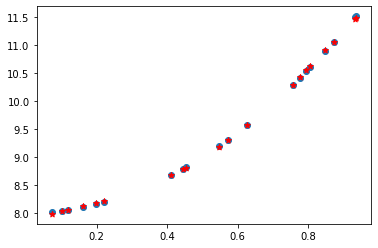

In [19]:
#设置模式为评估模式，即预测模式
myliner.eval()
predict=myliner(x)
predict=predict.data.numpy()
plt.scatter(x.data.numpy(),y_true.data.numpy())
plt.scatter(x.data.numpy(),predict,c='r',marker='*')
plt.show()

110.27729797363281 [Parameter containing:
tensor([[-0.2070]], requires_grad=True), Parameter containing:
tensor([-0.8001], requires_grad=True)]
8.166110038757324 [Parameter containing:
tensor([[3.0867]], requires_grad=True), Parameter containing:
tensor([5.0165], requires_grad=True)]
0.6678504943847656 [Parameter containing:
tensor([[3.9655]], requires_grad=True), Parameter containing:
tensor([6.6003], requires_grad=True)]
0.11651849746704102 [Parameter containing:
tensor([[4.1909]], requires_grad=True), Parameter containing:
tensor([7.0368], requires_grad=True)]
0.07535476982593536 [Parameter containing:
tensor([[4.2401]], requires_grad=True), Parameter containing:
tensor([7.1619], requires_grad=True)]
0.07173509895801544 [Parameter containing:
tensor([[4.2423]], requires_grad=True), Parameter containing:
tensor([7.2021], requires_grad=True)]
0.07094719260931015 [Parameter containing:
tensor([[4.2325]], requires_grad=True), Parameter containing:
tensor([7.2189], requires_grad=True)]
0

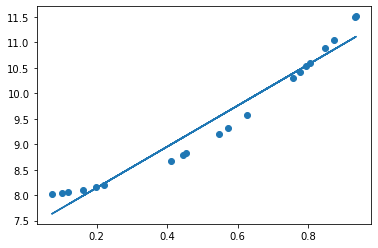

In [12]:
import matplotlib.pyplot as plt
import torch
from torch import nn as nn
from torch.optim import SGD
class Myliner(nn.Module):
    def __init__(self):
        super(Myliner,self).__init__()
        #传入特征数量，输出特征数量（传入列数，输出列数）
        self.linear=nn.Linear(1,1)
    #默认input，输入x
    def forward(self,x):
        out=self.linear(x)
        return out

myliner=Myliner()
#最优化策略
optimizer=SGD(myliner.parameters(),0.001)
#损失函数
loss_fn=nn.MSELoss()

for i in range(50000):
    y_predict=myliner(x)
    loss=loss_fn(y_predict,y_true)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%500==0:
        print(loss.item(),list(myliner.parameters()))

#设置模式为评估模式，即预测模式
myliner.eval()
predict=myliner(x)
predict=predict.data.numpy()
plt.scatter(x.data.numpy(),y_true.data.numpy())
plt.plot(x.data.numpy(),predict)
plt.show()

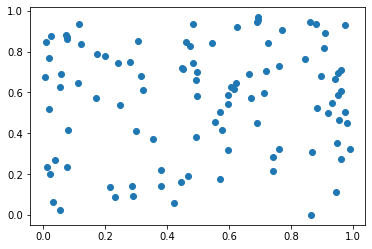

In [4]:
x=torch.rand([100,1])
y=torch.rand([100,1])
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [48]:
a=torch.cat([x,y],dim=1)
a

tensor([[7.7198e-01, 9.0766e-01],
        [6.6983e-01, 5.7062e-01],
        [3.2309e-01, 6.1120e-01],
        [1.9562e-02, 7.6985e-01],
        [6.2129e-01, 6.4417e-01],
        [4.2145e-01, 6.0283e-02],
        [4.9682e-01, 6.9967e-01],
        [9.8910e-01, 3.2458e-01],
        [4.5046e-01, 7.1365e-01],
        [6.2623e-01, 9.2071e-01],
        [1.9280e-02, 5.1800e-01],
        [4.4641e-01, 1.6388e-01],
        [2.2754e-02, 2.0162e-01],
        [2.5480e-02, 8.7763e-01],
        [3.0130e-01, 4.1132e-01],
        [4.8286e-01, 7.4301e-01],
        [4.8487e-01, 9.3614e-01],
        [9.4507e-01, 1.1203e-01],
        [8.4422e-01, 7.6200e-01],
        [1.1100e-02, 8.4922e-01],
        [4.9787e-01, 5.8216e-01],
        [9.8121e-01, 4.5010e-01],
        [5.9634e-01, 5.8641e-01],
        [3.5620e-01, 3.7233e-01],
        [5.4468e-01, 8.4149e-01],
        [5.7239e-01, 1.7631e-01],
        [6.8954e-01, 9.4345e-01],
        [4.9327e-01, 3.8145e-01],
        [7.2854e-03, 6.7604e-01],
        [2.010

In [49]:
import numpy as np
a=a.data.numpy()
a

array([[7.71977365e-01, 9.07659292e-01],
       [6.69830620e-01, 5.70618927e-01],
       [3.23089004e-01, 6.11196637e-01],
       [1.95622444e-02, 7.69845545e-01],
       [6.21290147e-01, 6.44165158e-01],
       [4.21447217e-01, 6.02834225e-02],
       [4.96822298e-01, 6.99671090e-01],
       [9.89099801e-01, 3.24582994e-01],
       [4.50461507e-01, 7.13653803e-01],
       [6.26233101e-01, 9.20706928e-01],
       [1.92803741e-02, 5.17998755e-01],
       [4.46407855e-01, 1.63876832e-01],
       [2.27538347e-02, 2.01617837e-01],
       [2.54798532e-02, 8.77625525e-01],
       [3.01297724e-01, 4.11318600e-01],
       [4.82863247e-01, 7.43014991e-01],
       [4.84871686e-01, 9.36138153e-01],
       [9.45070446e-01, 1.12025797e-01],
       [8.44216585e-01, 7.61999190e-01],
       [1.10996962e-02, 8.49216223e-01],
       [4.97869551e-01, 5.82163572e-01],
       [9.81211066e-01, 4.50096369e-01],
       [5.96340716e-01, 5.86406827e-01],
       [3.56200635e-01, 3.72325778e-01],
       [5.446838

In [58]:
a[0:,0]

array([0.77197737, 0.6698306 , 0.323089  , 0.01956224, 0.62129015,
       0.42144722, 0.4968223 , 0.9890998 , 0.4504615 , 0.6262331 ,
       0.01928037, 0.44640785, 0.02275383, 0.02547985, 0.30129772,
       0.48286325, 0.4848717 , 0.94507045, 0.8442166 , 0.0110997 ,
       0.49786955, 0.98121107, 0.5963407 , 0.35620064, 0.5446838 ,
       0.57239294, 0.68954366, 0.4932682 , 0.00728536, 0.20102167,
       0.03930271, 0.07514757, 0.6632572 , 0.7408947 , 0.23197526,
       0.38003248, 0.1721524 , 0.7263332 , 0.2874363 , 0.46206254,
       0.07583576, 0.11204153, 0.9313567 , 0.49362165, 0.31569886,
       0.9531032 , 0.2910986 , 0.8816217 , 0.9417759 , 0.7202529 ,
       0.07784408, 0.57880384, 0.47563392, 0.28084654, 0.972927  ,
       0.74039453, 0.8979029 , 0.44936836, 0.24909467, 0.7613982 ,
       0.57169926, 0.96193767, 0.959958  , 0.868083  , 0.9523803 ,
       0.7601865 , 0.05919433, 0.07890534, 0.24091196, 0.97302526,
       0.9468204 , 0.9193254 , 0.8834079 , 0.08036441, 0.71389

In [68]:
a[0:,1]

array([9.0765929e-01, 5.7061893e-01, 6.1119664e-01, 7.6984555e-01,
       6.4416516e-01, 6.0283422e-02, 6.9967109e-01, 3.2458299e-01,
       7.1365380e-01, 9.2070693e-01, 5.1799875e-01, 1.6387683e-01,
       2.0161784e-01, 8.7762552e-01, 4.1131860e-01, 7.4301499e-01,
       9.3613815e-01, 1.1202580e-01, 7.6199919e-01, 8.4921622e-01,
       5.8216357e-01, 4.5009637e-01, 5.8640683e-01, 3.7232578e-01,
       8.4149426e-01, 1.7631245e-01, 9.4344956e-01, 3.8144630e-01,
       6.7604113e-01, 7.8069562e-01, 2.7098382e-01, 8.7910753e-01,
       6.8951666e-01, 2.1509498e-01, 8.9847505e-02, 2.1931255e-01,
       5.7096040e-01, 8.4152472e-01, 1.4327824e-01, 8.4822965e-01,
       8.7381017e-01, 6.4436173e-01, 5.4827195e-01, 6.6324145e-01,
       6.7888343e-01, 5.8791196e-01, 9.5342100e-02, 9.3601996e-01,
       6.6383660e-01, 7.0283973e-01, 2.3361385e-01, 4.1797912e-01,
       8.2823765e-01, 7.4939346e-01, 5.0212228e-01, 2.8280103e-01,
       6.7832398e-01, 7.1761853e-01, 5.3916609e-01, 7.2924823e

In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#from 数据挖掘.geshi import format
#format()

#Set the font to bold to support Chinese display
mpl.rcParams['font.sans-serif']=['SimHei']
#Set the Chinese font to be able to display symbols normally
mpl.rcParams['axes.unicode_minus']=False

#Set the display length of value, the default is 50
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.width',10000)
#show all rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)



class KMeans:
    '''Kmeans聚类算法实现'''

    def __init__(self, k, times):
        '''初始化

        Parameters
        -----
        k: int 聚成几个类
        times: int 迭代次数
        '''
        self.k = k
        self.times = times

    def fit(self, X):
        '''根据所给数据训练

        Pararmeters
        ------
        X: 类数组类型，形如：[样本数量，特征数量]
        '''
        X = np.asarray(X)
        # 设置随机数种子，以便于可以相同的随机系列，以便随机结果重现
        np.random.seed(0)
        # 从数组中随机选择K个点作为初始聚类中心
        self.cluster_centers_ = X[np.random.randint(0, len(X), self.k)]
        #print(self.cluster_centers_)
        # 用于存放数据所属标签
        self.labels_ = np.zeros(len(X))
        # 开始迭代
        for t in range(self.times):
            # 循环遍历样本计算每个样本与聚类中心的距离
            for index, x in enumerate(X):
                # 计算每个样本与每个聚类中心的欧式距离
                dis = np.sqrt(np.sum((x - self.cluster_centers_) ** 2, axis=1))
                # 将最小距离的索引赋值给标签数组，索引的值就是当前所属的簇。范围（0，K-1）
                self.labels_[index] = dis.argmin()
                #print(self.labels_[index])
            # 循环便利每一个数更新聚类中心
            for i in range(self.k):
                # 计算每个簇内所有点的均值，用来更新聚类中心
                self.cluster_centers_[i] = np.mean(X[self.labels_ == i], axis=0)
                #print(self.cluster_centers_[i])
            #print(self.cluster_centers_)

    def predict(self, X):
        '''预测样本属于哪个簇

        Parameters
        -----
        x: 类数组类型。形如[样本数量。特征数量]

        Reeturn
        -----
        result: 类数组，每一个x所属的簇
        '''
        X = np.asarray(X)
        result = np.zeros(len(X))
        for index, x in enumerate(X):
            # 计算样本与聚类中心的距离
            dis = np.sqrt(np.sum((x - self.cluster_centers_) ** 2, axis=1))
            # 找到距离最近的聚类中中心划分一个类别
            result[index] = dis.argmin()
        return result
kmeans=KMeans(3,100)
kmeans.fit(a)
print(kmeans.cluster_centers_)

[[0.14411777 0.5442218 ]
 [0.70131516 0.75382155]
 [0.72612923 0.3209149 ]]


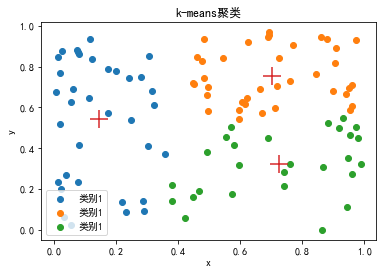

In [74]:
plt.scatter(a[kmeans.labels_==0][0:,0], a[kmeans.labels_==0][0:,1], label="类别1")
plt.scatter(a[kmeans.labels_==1][0:,0], a[kmeans.labels_==1][0:,1], label="类别1")
plt.scatter(a[kmeans.labels_==2][0:,0], a[kmeans.labels_==2][0:,1], label="类别1")
# 绘制聚类中心
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker="+",s=300)
plt.title("k-means聚类")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
a=torch.rand([20,1])